In [10]:
import librosa
import os as os
import pandas as pd
import re
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import cm, colors, colorbar
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
rdg = RidgeClassifier(alpha=0.5)
#mlp=MLPClassifier(random_state=1,max_iter=300,activation='relu',solver='sgd',learning_rate='constant',learning_rate_init=0.0001)
mlp=MLPClassifier(random_state=1,max_iter=300,activation='relu')
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=1,max_iter=500)
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0,max_depth=10)
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, random_state=1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(loss= 'log',random_state=1,max_iter=100,early_stopping=True,learning_rate='optimal',validation_fraction=0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mmscaler= MinMaxScaler()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
pca = PCA(n_components=2, svd_solver='full')
import random
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import librosa
import os as os
import pandas as pd
import re
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import cm, colors, colorbar
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mmscaler= MinMaxScaler()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf')
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
pca = PCA(n_components=2, svd_solver='full')
import random
import collections
from collections import Counter 
from sklearn.model_selection import StratifiedKFold,cross_val_score
import collections
import librosa
import os as os
import pandas as pd
import re
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import cm, colors, colorbar
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mmscaler= MinMaxScaler()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf')
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
pca = PCA(n_components=2, svd_solver='full')
import random
import collections
from collections import Counter 
from sklearn.model_selection import StratifiedKFold,cross_val_score      
import mealpy

#### Read data

In [11]:
coh={}
shorten_list={}
for time,directory,in zip([0,15,30,45,60,90,120,180,240],
                             ["/home/jupy/SourceAnalysis/T0","/home/jupy/SourceAnalysis/T15","/home/jupy/SourceAnalysis/T30",
                             "/home/jupy/SourceAnalysis/T45","/home/jupy/SourceAnalysis/T60","/home/jupy/SourceAnalysis/T90",
                             "/home/jupy/SourceAnalysis/T120","/home/jupy/SourceAnalysis/T180","/home/jupy/SourceAnalysis/T240"]
                           ):
    os.chdir(directory)
    coh[time]=os.listdir(directory)
    #coh[time].remove('.ipynb_checkpoints')

    shorten_list[time]=[]
    for i in range(0,len(coh[time])):  
        shorten_list[time].append(coh[time][i].split(str(time)+'min')[0])
   

In [12]:
# find those files that belong to the subjects that are not missing in any timestates
ns=(set(shorten_list[0])&set(shorten_list[15])&set(shorten_list[30])&set(shorten_list[45])&set(shorten_list[60])&set(shorten_list[90])&set(shorten_list[120])&set(shorten_list[180])&set(shorten_list[240]) 
        )
ns=list(ns)
ns.sort()

random.shuffle(ns)  ### Shuffle the list

ns_l=[]
ns_ob=[]
for n in ns:
    if n[0]=='L':
        ns_l.append(n)
    else:
        ns_ob.append(n)

In [13]:
names_l=[]
for i in ns_l:
    name=i+'0min.EDFOUT-ROIlaggedCoh-covar.txt'
    names_l.append(name)

names_ob=[]
for r in ns_ob:
    name=r+'0min.EDFOUT-ROIlaggedCoh-covar.txt'
    names_ob.append(name)

In [14]:
print(names_l[0], names_ob[0])
#print(len(names_l),len(names_ob))

names_l=names_l[0:30]

L46 MI control 0min.EDFOUT-ROIlaggedCoh-covar.txt F218 TW baseline 0min.EDFOUT-ROIlaggedCoh-covar.txt


In [15]:
ob_name_ls={}
for t in [0,15,30,45,60,90,120,180,240]:
    sr=str(t)+'min' 
    print(sr)
    ob_name_ls[t]=[]
    for n in names_ob:
        nn=n.replace('0min',sr)
        ob_name_ls[t].append(nn)

0min
15min
30min
45min
60min
90min
120min
180min
240min


In [16]:
l_name_ls={}
for t in [0,15,30,45,60,90,120,180,240]:
    sr=str(t)+'min' 
    print(sr)
    l_name_ls[t]=[]
    for n in names_l:
        nn=n.replace('0min',sr)
        l_name_ls[t].append(nn)

0min
15min
30min
45min
60min
90min
120min
180min
240min


In [17]:
names_list={}
for t in [0,15,30,45,60,90,120,180,240]:
    names_list[t]=l_name_ls[t]+ob_name_ls[t]

In [18]:
def extract_connectivity(band,data):
    Y=[]
    coh_ar=np.zeros([len(data),88*88])
    for i in range(0,len(data)):
        m=np.loadtxt(data[i])[band*88:(band+1)*88,:] # extract only delta band 
        m=np.tril(m, k=-1).flatten()  ## Take upper/lower Triangle of the Symetrical Coherence Matrix
        coh_ar[i,:]=m
        #cor_ar=cor_ar[0:60,:]
        if (data[i][0])=='L':
            Y.append(1)
        else:
            Y.append(0)
        #Y=Y[0:60]
    return coh_ar,Y

In [19]:
freq_band=2

In [20]:
connectivity={}
for band in [freq_band]:  # 0-delta, 1-theta, 2-alpha, 3-beta, 4-gamma
    print(band)
    connectivity[band]=np.zeros([1,88*88])
    Y=[]
    for time,directory,in zip([0,15,30,45,60,90,120,180,240],
                             ["/home/jupy/SourceAnalysis/T0","/home/jupy/SourceAnalysis/T15","/home/jupy/SourceAnalysis/T30",
                             "/home/jupy/SourceAnalysis/T45","/home/jupy/SourceAnalysis/T60","/home/jupy/SourceAnalysis/T90",
                             "/home/jupy/SourceAnalysis/T120","/home/jupy/SourceAnalysis/T180","/home/jupy/SourceAnalysis/T240"]
                           ):
        os.chdir(directory)
        data=names_list[time][0:60]
        con=extract_connectivity(band,data)[0]
        y=extract_connectivity(band,data)[1]
        connectivity[band]=np.vstack([connectivity[band],con])
        Y=Y+y
        
    connectivity[band]=connectivity[band][1:,:]
    print(connectivity[band].shape)
    print(connectivity[band][6,7000])

2
(540, 7744)
0.06793687


In [21]:
def extract_connectivity(band,data):
    Y=[]
    coh_ar=np.zeros([len(data),88*88])
    for i in range(0,len(data)):
        m=np.loadtxt(data[i])[band*88:(band+1)*88,:] # extract only delta band 
        
        m=np.tril(m, k=-1).flatten()  ## Take upper/lower Triangle of the Symetrical Coherence Matrix
        coh_ar[i,:]=m
        #cor_ar=cor_ar[0:60,:]
        if (data[i][0])=='L':
            Y.append(1)
        else:
            Y.append(0)
        #Y=Y[0:60]
    return coh_ar,Y

In [22]:
len(y)

60

## Train Test Split

In [23]:
Xtv_id={}
Xtest_id={}
index_lean={}
index_ob={}
for s in range(0,10):
    index_lean[s]= ([np.where(np.array(y)==1)][0][0])[s*int(60/10/2):(s+1)*int(60/10/2)]
    index_ob[s]= ([np.where(np.array(y)==0)][0][0])[s*int(60/10/2):(s+1)*int(60/10/2)]
    print(s,index_ob[s],index_lean[s])
    index_test=index_lean[s].tolist()+index_ob[s].tolist()
    Xtest_id[s]=index_test
    index_train=np.arange(0,60)[np.isin(np.arange(0,60), index_test,invert=True)]
    Xtv_id[s]=index_train

Xdata=connectivity[freq_band] ## change band here
Ydata=np.array(Y)
Xtv={}
Ytv={}
Xtest={}
Ytest={}
for s in range(0,10):
    Xtv[s]=np.zeros([9,7744])
    Ytv[s]=np.zeros([9,])
    for train_id in Xtv_id[s]:
        Xtv[s]=np.vstack([Xtv[s],Xdata[train_id*9:(train_id+1)*9,:]])
        Ytv[s]=np.hstack([Ytv[s],Ydata[train_id*9:(train_id+1)*9,]])
    Xtv[s]=Xtv[s][9:,:] 
    Ytv[s]=Ytv[s][9:]
    
    Xtest[s]=np.zeros([9,7744])
    Ytest[s]=np.zeros([9,])
    for test_id in Xtest_id[s]:
        Xtest[s]=np.vstack([Xtest[s],Xdata[test_id*9:(test_id+1)*9,:]])
        Ytest[s]=np.hstack([Ytest[s],Ydata[test_id*9:(test_id+1)*9,]])
    Xtest[s]=Xtest[s][9:,:]  
    Ytest[s]=Ytest[s][9:]

0 [30 31 32] [0 1 2]
1 [33 34 35] [3 4 5]
2 [36 37 38] [6 7 8]
3 [39 40 41] [ 9 10 11]
4 [42 43 44] [12 13 14]
5 [45 46 47] [15 16 17]
6 [48 49 50] [18 19 20]
7 [51 52 53] [21 22 23]
8 [54 55 56] [24 25 26]
9 [57 58 59] [27 28 29]


# MQSVM

In [24]:
import minepy
from minepy import MINE
import SwarmML

In [26]:
s=0 # iterative from 0 to 10

(486, 7744)

In [173]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mic_lst=[]
for i in range(0,Xtv[s].shape[1]):
    mine.compute_score(Xtv[s][:,i], Ytv[s])
    #print(mine.mic())
    mic_lst.append(mine.mic())

In [174]:
filtered_feat=sorted(range(len(mic_lst)), key=lambda i: mic_lst[i], reverse=True)[:75]

obj = SwarmML.FeatureSelection.Particle_Swarm_Optimization('Classification')
Best_Features, Best_Score = obj.run(Xtv[s][:,filtered_feat], Ytv[s])

Following are the indices of selected features:  [ 2  3  5 10 12 13 14 17 19 20 22 24 26 27 28 29 33 35 38 39 40 43 47 49
 50 54 56 59 61 64 65 66 67 69 72]


In [175]:
frequencyDict_mqsvm=np.array(filtered_feat)[Best_Features]
frequencyDict_mqsvm

array([6437, 5590, 7709, 3546, 4159, 5040, 4161, 3808, 7617, 7458, 4753,
       5405, 4879, 5404, 5281, 5457, 4227, 5418, 6218, 6406, 2216, 3257,
       5219, 3984, 3093, 6018, 3260, 5479, 6016, 3372, 4956, 6525, 5866,
       5581, 5463])

In [176]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_mqsvm),1):
    re=[]
    for s in range(1,10):
        clf_svm=knn
        #clf_svm=SVC(kernel='rbf',random_state=42)#knn#AdaBoostClassifier(n_estimators=50, random_state=0)#knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_mqsvm[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.6088482615268329
number of features 2 score 0.5893660241874528
number of features 3 score 0.6381377551020408
number of features 4 score 0.6665580120937262
number of features 5 score 0.7233323885109599
number of features 6 score 0.7197940287226001
number of features 7 score 0.731849962207105
number of features 8 score 0.7427059712773999
number of features 9 score 0.7568830309901738
number of features 10 score 0.7687027588813304
number of features 11 score 0.7687925170068026
number of features 12 score 0.7697326152683295
number of features 13 score 0.7963907785336357
number of features 14 score 0.8026407785336357
number of features 15 score 0.8187877928949356
number of features 16 score 0.8192082388510958
number of features 17 score 0.8304374527588814
number of features 18 score 0.8276785714285714
number of features 19 score 0.8348356009070295
number of features 20 score 0.842072940287226
number of features 21 score 0.8514928193499621
number of features 22 sc

In [218]:
#score_list_sqsvm=score_list
score_list_sqsvm=score_list_sqsvm+[0.890,0.892]

# Sleep Stage

In [133]:
def fisher_score(list1, list2):
    array1 = np.array(list1)
    array2 = np.array(list2)
    mean1 = np.mean(array1)
    mean2 = np.mean(array2)
    between_class_variance = ((mean1 - mean2) ** 2) / (np.var(array1) + np.var(array2))
    return between_class_variance


fisher_lst=[]
non_zero_feat=[]
for i in range(0,Xtv[s].shape[1]):
    if sum(Xtv[s][:,i]!=0):
        non_zero_feat.append(i)
        fisher_lst.append(fisher_score(Xtv[s][:,i], Ytv[s]))

In [134]:
both_score=np.array(mic_lst)[non_zero_feat]+np.array(fisher_lst)

both_score_id=sorted(range(len(both_score)), key=lambda i: both_score[i], reverse=True)[:100]
both_filtered_feat=np.array(non_zero_feat)[both_score_id]

In [135]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
s=0
sffs = SFS(knn,#SVC(kernel='rbf',random_state=42) 
           k_features=50, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sffs = sffs.fit(Xtv[s][:,both_filtered_feat], Ytv[s])

In [179]:
#frequencyDict_sleep=both_filtered_feat[np.array(sffs.subsets_[50]['feature_idx'])]
frequencyDict_sleep=np.array([7052, 7319, 7028, 6616, 7208, 7457, 7202, 5684, 7105, 6877, 6929,
       7378, 7106, 1600, 7119, 7049, 7093, 7024, 7180, 7380, 7060, 7030,
       2568, 6828, 6691, 5772, 7128, 7004, 6986, 6717, 7458, 6881, 6689,
       7068, 5773, 6879, 4592, 4583, 7281, 6864, 4678, 6513, 7144, 6970,
       7318, 6869, 6891, 7108, 7055, 7648])

In [180]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_sleep),1):
    re=[]
    for s in range(1,10):
        clf_svm=knn
        #clf_svm=SVC(kernel='rbf',random_state=42)#knn#AdaBoostClassifier(n_estimators=50, random_state=0)#knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_sleep[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5692460317460316
number of features 2 score 0.5859032501889645
number of features 3 score 0.5925689720332578
number of features 4 score 0.6260298563869993
number of features 5 score 0.6229402872260015
number of features 6 score 0.6685799319727891
number of features 7 score 0.6647203325774754
number of features 8 score 0.6975151171579742
number of features 9 score 0.686583522297808
number of features 10 score 0.7003590325018896
number of features 11 score 0.701677059712774
number of features 12 score 0.7162981859410431
number of features 13 score 0.7155801209372638
number of features 14 score 0.75
number of features 15 score 0.7472694633408918
number of features 16 score 0.7488567649281934
number of features 17 score 0.7459845049130762
number of features 18 score 0.7609882842025698
number of features 19 score 0.7539588057445199
number of features 20 score 0.7617016250944822
number of features 21 score 0.764460506424792
number of features 22 score 0.763014928

In [181]:
 score_list_sleep=score_list

# EWW

In [16]:
        from scipy.stats import pearsonr
        def compute_cor(new_select_feat,existing_feat):
            Co=[]
            for n in range(0,existing_feat.shape[1]):
                a=new_select_feat
                b=existing_feat[:,n]
                a = (a - np.mean(a)) / (np.std(a) )
                b = (b - np.mean(b)) / (np.std(b))
                co=pearsonr(b,a.tolist())[0]
                Co.append(co)
                #print(Co)
            COR=sum(Co)/len(Co)
            return COR


        def select_top_n_feature(data,numb_feat,id_ls,y):
                    dX=id_ls
                    Top1_feat_id=[]
                    rf.fit(data[:,dX],y)
                    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
                    return (Top1_feat_id)
        
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        def kfoldCV(xdata,ydata):
            cv = KFold(n_splits=10,  shuffle=False)
            classifier=SVC(kernel='rbf')
            #classifier=knn
            acc = cross_val_score(classifier, xdata, ydata, scoring='accuracy', cv=cv, n_jobs=-1)
            avg_acc=sum(acc/acc.shape[0])
            return (avg_acc )    
    
        from sklearn.preprocessing import MinMaxScaler 
        import math
        ####### wrapper + weighted wrapper ############
        print('####### wrapper + weighted wrapper ############')
        mrmr_feat_numb_plot={}
        weight_vector=np.ones([len(list(range(1, np.arange(0,Xtv[s].shape[1]).shape[0]+1)))])
        numb_feat=1
        existing_id_ls={}
        acc_dif={}
        DF={}
        numb_runs=1000
        rf_filtered_id_ls={}
        for s in range(1,10):
            Xdata_train=Xtv[s]
            Ydata_train=Ytv[s]
            rf_filtered_id_ls[s]=select_top_n_feature(Xdata_train,Xdata_train.shape[1],
                                                      np.arange(0,Xdata_train.shape[1]),Ydata_train)
            
            print('########set#######',s)

            
            #existing_id_ls[s]=[rf_filtered_id_ls[s][0]]
            existing_id_ls[s]=select_top_n_feature(Xdata_train,1,np.arange(0,Xdata_train.shape[1]),Ytv[s])
            rest_id_ls = [e for e in rf_filtered_id_ls[s] if e not in existing_id_ls[s]]

            mrf_index = 0
            consecutive_runs = 0 
            #while mrf_index < len(rest_id_ls) and consecutive_runs < numb_runs:
            while mrf_index < len(rest_id_ls) and mrf_index < numb_runs:
                print('run',mrf_index)
                mrf = rest_id_ls[mrf_index]
                select_id = existing_id_ls[s] + [mrf]
                #print('existing selected+new selected:', select_id)
                xdata = Xdata_train[:, select_id]
                ydata = np.array(Ydata_train)
                acc_newf = kfoldCV(xdata, ydata)

                xdata1 = Xdata_train[:, existing_id_ls[s]]
                ydata1 = np.array(Ydata_train)
                acc_currentselect = kfoldCV(xdata1, ydata1)
                print('p_gain:', acc_newf - acc_currentselect)

                #if acc_newf > acc_currentselect:
                if acc_newf - acc_currentselect>0.05:
                    existing_id_ls[s] = existing_id_ls[s] + [mrf]
                    #print('existing_id_ls[s]:', existing_id_ls[s])

                    consecutive_runs = 0  # Reset the counter if acc_newf > acc_currentselect
                else:
                    consecutive_runs += 1

                    selected_id=np.array(existing_id_ls[s] + [mrf])
                    print('selected_id',selected_id)

                    ##### Use the rank of MRMR selection as weight, the earlier the feature selected by mrmr, the higher the weight * feature importance score
                    rf.fit(Xdata_train[:, selected_id], Ydata_train)
                    imp_score=rf.feature_importances_

                    positions = [ii for ii, xxx in enumerate(np.arange(0,Xdata_train.shape[1])) if xxx in selected_id]
                    weight_score=np.array(weight_vector)[positions]

                    #print('rf_score',imp_score)
                    #print('weight_score',weight_score)
                    toremove_id = select_id [np.argmin(imp_score*weight_score)]
                    #print('removed_id:', toremove_id)
                    existing_id_ls[s]=select_id
                    existing_id_ls[s].remove(toremove_id)
                    #print('existing_id_ls[s]:', existing_id_ls[s]) 

                if consecutive_runs == numb_runs:
                    break
                if len(existing_id_ls[s])>30:
                    break
                mrf_index += 1
                print('consecutive_runs',consecutive_runs)
                print('existing_id_ls',existing_id_ls[s])
       

####### wrapper + weighted wrapper ############
########set####### 1
run 0
p_gain: 0.0758503401360544
consecutive_runs 0
existing_id_ls [2389, 5463]
run 1
p_gain: 0.008290816326530503
selected_id [2389 5463  976]
consecutive_runs 1
existing_id_ls [5463, 976]
run 2
p_gain: 0.08835034013605436
consecutive_runs 0
existing_id_ls [5463, 976, 1330]
run 3
p_gain: 0.004251700680272141
selected_id [5463  976 1330 2568]
consecutive_runs 1
existing_id_ls [5463, 1330, 2568]
run 4
p_gain: 0.012372448979591888
selected_id [5463 1330 2568 6134]
consecutive_runs 2
existing_id_ls [5463, 1330, 2568]
run 5
p_gain: 0.024702380952381087
selected_id [5463 1330 2568 1507]
consecutive_runs 3
existing_id_ls [5463, 1330, 2568]
run 6
p_gain: 0.035204081632653095
selected_id [5463 1330 2568  888]
consecutive_runs 4
existing_id_ls [5463, 1330, 2568]
run 7
p_gain: 0.004081632653061273
selected_id [5463 1330 2568 4857]
consecutive_runs 5
existing_id_ls [5463, 1330, 2568]
run 8
p_gain: 0.03486394557823136
selected_id

In [78]:
EWWW_feat_svm={}
for s in range(1,10):
    print(existing_id_ls[s])
    EWWW_feat_svm[s]=existing_id_ls[s]

NameError: name 'existing_id_ls' is not defined

In [182]:
os.chdir('/home/jupy/SourceAnalysis/BenchmarkDataset/EMBC2024/EWWW_feat')
EWWW_feat_knn={}
for s in range(1,10):
    EWWW_feat_knn[s]=np.loadtxt(f"EWWW_feat{s}").astype(int).tolist()
    print(EWWW_feat_knn[s])
    
selected_fid_ls=[]
for s in range(1,10):
    SS=EWWW_feat_knn[s]
    selected_fid_ls=selected_fid_ls+SS

frequencyDict = collections.Counter(selected_fid_ls)
frequencyDict = np.array(frequencyDict.most_common())[:,0]
frequencyDict_knn=frequencyDict 
frequencyDict_knn

[5461, 6877, 4847, 5457, 5333, 4345, 7143, 1685, 6020]
[1685, 4845, 5461, 7546, 2579, 4345, 5333, 7617]
[5333, 7191, 4845, 1330, 4983, 4141, 5847]
[1330, 4845, 4982, 6134, 2579, 5333, 6897, 4345, 1685, 4851, 7631]
[5457, 7546, 6297, 4847, 1685, 5739, 4982, 7671, 6897]
[1330, 5461, 7143, 4983, 4345, 1685, 1244, 4137, 4845, 4159]
[4845, 4983, 7191, 1330, 5739, 7009, 1685, 7709, 4517, 3257]
[7143, 5457, 4982, 1685, 4345, 2579, 4227, 6167]
[2568, 5461, 6877, 4982, 1057, 4345, 4888, 2579, 2750, 6801]


array([1685, 4345, 4845, 5461, 5333, 2579, 1330, 4982, 5457, 7143, 4983,
       6877, 4847, 7546, 7191, 6897, 5739, 6020, 7617, 4141, 5847, 6134,
       4851, 7631, 6297, 7671, 1244, 4137, 4159, 7009, 7709, 4517, 3257,
       4227, 6167, 2568, 1057, 4888, 2750, 6801])

In [183]:
os.chdir('/home/jupy/SourceAnalysis/BenchmarkDataset/EMBC2024/EWWW_SVM_feat')
EWWW_feat_svm={}
for s in range(1,10):
    EWWW_feat_svm[s]=np.loadtxt(f"EWWW_feat_svm{s}").astype(int).tolist()
    #print(EWWW_feat_svm[s])
    
selected_fid_ls=[]
for s in range(1,10):
    SS=EWWW_feat_svm[s]
    selected_fid_ls=selected_fid_ls+SS

frequencyDict = collections.Counter(selected_fid_ls)
frequencyDict = np.array(frequencyDict.most_common())[:,0]
frequencyDict_svm=frequencyDict 
frequencyDict_svm

array([1330, 6297, 7009, 4137, 5457, 2579, 5463, 4965, 7617, 4175, 7546,
       5899, 4165, 5817, 5908, 1685, 5104, 2392, 4159, 3023, 4694, 1326,
       6165, 4313, 4879, 4091, 4982, 4693, 4847, 4983, 5285, 3901, 3257,
       1244, 5287,  354])

In [186]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_svm),1):
    re=[]
    for s in range(1,10):
        clf_svm=knn
        #clf_svm=SVC(kernel='rbf',random_state=42)#knn#AdaBoostClassifier(n_estimators=50, random_state=0)#knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_svm[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5161281179138322
number of features 2 score 0.6578420256991686
number of features 3 score 0.7003873771730914
number of features 4 score 0.7177248677248679
number of features 5 score 0.7512424414210128
number of features 6 score 0.7934948979591837
number of features 7 score 0.817214663643235
number of features 8 score 0.8299792139077853
number of features 9 score 0.8302673847316704
number of features 10 score 0.8435043461829177
number of features 11 score 0.8856812169312168
number of features 12 score 0.8815712396069538
number of features 13 score 0.8883786848072562
number of features 14 score 0.8960742630385489
number of features 15 score 0.8992299697656839
number of features 16 score 0.9026738473167045
number of features 17 score 0.9136101662887377
number of features 18 score 0.9168083900226759
number of features 19 score 0.9156320861678005
number of features 20 score 0.9170304232804233
number of features 21 score 0.9213624338624338
number of features 22 s

In [187]:
EWWW_score_list_svm=score_list

In [81]:
import statistics
EWW_fused_feat=frequencyDict_knn[0:np.argmax(score_list) ]
#EWW_fused_feat=frequencyDict[0:13 ]
print('# features: ',len(EWW_fused_feat) )

acc=[]
pred_dbs_T_dif_alpha={}
clf_svm=SVC(kernel='rbf')
clf_svm=knn
for s in range(0,10):
    clf_svm.fit(Xtv[s][:,EWW_fused_feat],Ytv[s])
    #print(s, accuracy_score(clf_svm.predict(Xtest[s][:,EWW_fused_feat]),Ytest[s]))
    pred_dbs_T_dif_alpha[s]= clf_svm.predict(Xtest[s][:,EWW_fused_feat])
    acc.append(accuracy_score(clf_svm.predict(Xtest[s][:,EWW_fused_feat]),Ytest[s]))
print('avg',sum(acc)/10)
print('std', statistics.stdev(acc))


# features:  35
avg 0.937037037037037
std 0.03049157786476163


# SFFS 
https://github.com/rasbt/mlxtend/tree/master/docs/sources/user_guide/feature_selection/SequentialFeatureSelector_files

In [203]:

def select_top_n_feature(data,numb_feat,id_ls,y):
                    dX=id_ls
                    Top1_feat_id=[]
                    rf.fit(data[:,dX],y)
                    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
                    return (Top1_feat_id)
        

In [220]:
s=3 # iterate form 0 -10
top100=select_top_n_feature(Xtv[s],40,np.arange(0,Xtv[s].shape[1]),Ytv[s])

In [244]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
s=0
sffs = SFS(knn, 
           k_features=35, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sffs = sffs.fit(Xtv[s][:,top100], Ytv[s])

#SFFS_feat={}
SFFS_feat=np.array(sffs.subsets_[35]['feature_idx'])
SFFS_feat
frequencyDict=np.array(top100)[SFFS_feat]

selected_fid_ls=[]
for s in range(1,10):
    SS=SFFS_feat[s]
    selected_fid_ls=selected_fid_ls+SS

frequencyDict = collections.Counter(selected_fid_ls)
frequencyDict = np.array(frequencyDict.most_common())[:,0]
frequencyDict

In [288]:


cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,40,1):
    re=[]
    for s in range(1,10):
        #clf_svm=SVC(kernel='rbf',random_state=42)
        clf_svm=knn#AdaBoostClassifier(n_estimators=50, random_state=0)#knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5160856009070294
number of features 2 score 0.5747921390778533
number of features 3 score 0.6739984882842025
number of features 4 score 0.6905990173847317
number of features 5 score 0.7503448601662888
number of features 6 score 0.7599914965986394
number of features 7 score 0.7807114512471656
number of features 8 score 0.7936885865457294
number of features 9 score 0.8255810657596372
number of features 10 score 0.8490079365079365
number of features 11 score 0.856084656084656
number of features 12 score 0.8648289871504159
number of features 13 score 0.8799461451247166
number of features 14 score 0.8909297052154196
number of features 15 score 0.8939720332577475
number of features 16 score 0.8972174981103552
number of features 17 score 0.9018707482993196
number of features 18 score 0.9066373771730915
number of features 19 score 0.9091411564625849
number of features 20 score 0.9184145880574452
number of features 21 score 0.9145219198790628
number of features 22 s

In [289]:
SFFS_score_list=score_list

# KNFI
https://github.com/sl-93/Mini-Batch-Normalized-Mutual-Information-A-Hybrid-Feature-Selection-Method/tree/master

In [70]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import classification_report
def nmi(digitsx,digitsy):
    #normalizing data
    x = MinMaxScaler().fit_transform(digitsx)
    x = pd.DataFrame(x)
    y = pd.DataFrame(digitsy)
    #splitting data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    a = x.values
    b = y.values
    b = b.flatten()
    S = []
    k = []
    
    #clustering each feature and calculating NMI 
    for i in range(a.shape[1]):
        km = MiniBatchKMeans(init='k-means++', n_clusters=np.unique(b).shape[0],batch_size=50)
        p = km.fit_predict(a[:,i].reshape(-1,1))
        s = normalized_mutual_info_score(b,p)
        S.append(s)
        k.append(i)
    s = pd.DataFrame(S).sort_values(by = 0,ascending=False )
    l = s.index.values.astype(int) 
    
    #initializing SVC
    svclassifier = SVC(kernel='linear')
    
    #model fitting with All features
    #print("\nRESULT FOR ALL FEATURES \n")
    
    #fitting the model with the selected features
    svclassifier.fit(x_train , np.ravel(y_train))
    y_pred = svclassifier.predict(x_test)
    acc=accuracy_score(np.ravel(y_test), y_pred)
    #print("\nClassification: \n")
    print(classification_report(y_test,y_pred, digits=4))
    print("-----------------------------------------------------\n")
    
    #model fitting with the selected features KNMIFI
    x_train1 = x_train.iloc[:,l[0]]
    x_test1 = x_test.iloc[: ,l[0]]
    l1 = []
    l1.append(l[0])
    prev=0    
    for i in range(1,len(l)):
        x_train1 = pd.concat([x_train1 , x_train.iloc[:,l[i]]] , axis=1)
        x_test1 = pd.concat([x_test1 , x_test.iloc[:,l[i]]] , axis=1)
        svclassifier.fit(x_train1 , np.ravel(y_train))
        y_pred = svclassifier.predict(x_test1)
        acc=accuracy_score(np.ravel(y_test), y_pred)
        if acc > prev:
            if(i != len(l)-1):
                l1.append(l[i])
                prev = acc
            else:
                print(l1)
        else:
            x_train1 = x_train1.drop([l[i]] , axis=1)
            x_test1 = x_test1.drop([l[i]] , axis=1)
            del l1[-1]
            if(i != len(l)-1):
                l1.append(l[i])
                
    #print("RESULT FOR KNMIFI")
    svclassifier.fit(x_train1 , np.ravel(y_train))
    y_pred = svclassifier.predict(x_test1)
    acc=accuracy_score(np.ravel(y_test), y_pred)
    print('accuracy',acc)
    #print("\nClassification: \n")
    #print(classification_report(y_test,y_pred, digits=4))
    #print("\nNUMBER OF FEATURES SELECTED: " + str(len(l1)))
    #print("\n-----------------------------------------------------\n")

    #plt.show()
    
    return l1

In [ ]:
KNFI_feat={}
for s in range(0,10):
    print('############ set #############',s)
    KNFI_feat[s]=nmi(Xtv[s],Ytv[s])

In [43]:
os.chdir('/home/jupy/SourceAnalysis/BenchmarkDataset/EMBC2024/KNFI_feat')
KNFI_feat={}
for s in range(1,10):
    KNFI_feat[s]=np.loadtxt(f"KNFI_feat{s}").astype(int).tolist()
    print(KNFI_feat[s])

[7053, 6877, 7143, 7722, 1057, 6967, 6530, 3532, 6543, 7737, 705, 7106, 4345, 5936, 7671, 6887, 4855, 7455, 6457, 5820, 6776, 6925, 6889, 4622]
[7722, 6877, 1768, 7155, 4842, 1057, 7177, 1145, 6545, 7474, 6994, 6935, 7153, 5472, 6002, 6999, 353, 2651, 5425, 7161, 1859, 6284, 4848]
[7143, 6877, 7053, 1057, 705, 4857, 6737, 4675, 7468, 707, 7225, 3808, 5114]
[7053, 6877, 7143, 1057, 6931, 7709, 1058, 5820, 5384, 4345, 5212, 7717, 6453, 4151, 4357, 5424, 5054, 3015, 4434, 2655, 6107]
[7722, 7143, 1768, 4604, 7106, 6264, 5651, 6915, 5650, 2932, 7013, 4873, 5499, 3113, 7047, 3372]
[6877, 7143, 7155, 6545, 7011, 4857, 2931, 5732, 4333, 7000, 7091, 6268, 5500, 5685, 7632, 7342, 6192, 7603, 7260]
[6877, 7576, 7053, 7143, 6737, 6891, 6966, 2040, 6927, 6897, 3976, 3082, 6544, 1326, 4894]
[7053, 6877, 7143, 6996, 1057, 7184, 1331, 4982, 6963, 7400, 6573, 4521, 1593, 5380, 2388, 6030, 6965, 7050]
[7722, 6877, 7143, 6998, 7184, 3735, 4528, 5338, 3111, 5771, 5161, 7677, 3351, 4752, 440]


In [44]:
selected_fid_ls=[]
for s in range(1,10):
    SS=KNFI_feat[s]
    selected_fid_ls=selected_fid_ls+SS

frequencyDict = collections.Counter(selected_fid_ls)
frequencyDict = np.array(frequencyDict.most_common())[:,0]
frequencyDict_knfi=frequencyDict
frequencyDict_knfi

array([6877, 7143, 7053, 1057, 7722,  705, 7106, 4345, 5820, 1768, 7155,
       6545, 4857, 6737, 7184, 6967, 6530, 3532, 6543, 7737, 5936, 7671,
       6887, 4855, 7455, 6457, 6776, 6925, 6889, 4622, 4842, 7177, 1145,
       7474, 6994, 6935, 7153, 5472, 6002, 6999,  353, 2651, 5425, 7161,
       1859, 6284, 4848, 4675, 7468,  707, 7225, 3808, 5114, 6931, 7709,
       1058, 5384, 5212, 7717, 6453, 4151, 4357, 5424, 5054, 3015, 4434,
       2655, 6107, 4604, 6264, 5651, 6915, 5650, 2932, 7013, 4873, 5499,
       3113, 7047, 3372, 7011, 2931, 5732, 4333, 7000, 7091, 6268, 5500,
       5685, 7632, 7342, 6192, 7603, 7260, 7576, 6891, 6966, 2040, 6927,
       6897, 3976, 3082, 6544, 1326, 4894, 6996, 1331, 4982, 6963, 7400,
       6573, 4521, 1593, 5380, 2388, 6030, 6965, 7050, 6998, 3735, 4528,
       5338, 3111, 5771, 5161, 7677, 3351, 4752,  440])

In [104]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_knfi),1):
    re=[]
    for s in range(1,10):
        #clf_svm=SVC(kernel='rbf',random_state=42)
        clf_svm=knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_knfi[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5306878306878307
number of features 2 score 0.5570767195767194
number of features 3 score 0.5934807256235827
number of features 4 score 0.6438917233560091
number of features 5 score 0.680172902494331
number of features 6 score 0.6823932350718064
number of features 7 score 0.7110402494331065
number of features 8 score 0.7609079743008313
number of features 9 score 0.7854591836734695
number of features 10 score 0.8084892290249432
number of features 11 score 0.8234835600907028
number of features 12 score 0.8423327664399093
number of features 13 score 0.8295115268329554
number of features 14 score 0.8380149281934997
number of features 15 score 0.8325255102040816
number of features 16 score 0.8330687830687831
number of features 17 score 0.869505857898715
number of features 18 score 0.8587585034013606
number of features 19 score 0.8653628117913832
number of features 20 score 0.871499433106576
number of features 21 score 0.8698790627362056
number of features 22 sco

In [105]:
KNFI_score_list=score_list

In [52]:
KNFI_fused_feat=frequencyDict_knfi[0:np.argmax(score_list) ]
#EWW_fused_feat=frequencyDict[0:13 ]
print('# features: ',len(KNFI_fused_feat) )

acc=[]
pred_dbs_T_dif_alpha={}
#clf_svm=knn
clf_svm=SVC(kernel='rbf')
for s in range(0,10):
    
    clf_svm.fit(Xtv[s][:,KNFI_fused_feat],Ytv[s])
    #print(s, accuracy_score(clf_svm.predict(Xtest[s][:,KNFI_fused_feat]),Ytest[s]))
    pred_dbs_T_dif_alpha[s]= clf_svm.predict(Xtest[s][:,KNFI_fused_feat])
    acc.append(accuracy_score(clf_svm.predict(Xtest[s][:,KNFI_fused_feat]),Ytest[s]))
print('avg',sum(acc)/10)
print('std',statistics.stdev(acc))


# features:  61
avg 0.8407407407407408
std 0.05534941178138245


### mRMR

In [160]:
import mrmr
from mrmr import mrmr_classif
MRMR_feat={}
for s in range(0,10):
    MRMR_feat[s]=mrmr_classif(X=pd.DataFrame(Xtv[s]), y=pd.Series(Ytv[s]), K=40)

100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.10it/s]


In [161]:
selected_fid_ls=[]
for s in range(0,10):
    SS=MRMR_feat[s]
    selected_fid_ls=selected_fid_ls+SS

frequencyDict = collections.Counter(selected_fid_ls)
frequencyDict = np.array(frequencyDict.most_common())[:,0]
frequencyDict

array([7053, 1330, 1144, 6877, 1056, 1597, 6792, 4982, 2744, 1058, 6887,
       7052, 6935, 6897, 6530, 7116, 1061, 7114, 1420, 7709, 6616, 4983,
       7049, 4754, 6925, 6923, 1421, 3976, 7170, 6907, 5739,  704, 6913,
       6915, 7143, 1146, 1408, 6264, 6909, 3533, 7320, 2040, 7737, 7028,
       6891, 6706, 4504, 7621, 6876, 1326, 1057,  792, 4400, 7186, 7190,
       6967, 6927, 6911, 4842, 6986, 6869, 1507, 4345, 7139, 1593, 7048,
       1596])

In [191]:
frequencyDict_mrmr=[7053, 1330, 1144, 6877, 1056, 1597, 6792, 4982, 2744, 1058, 6887, 7052, 6935, 6897, 6530, 7116, 1061, 7114, 1420, 7709, 6616, 4983, 7049, 4754, 6925, 6923, 1421, 3976, 7170, 6907, 5739, 704, 6913, 6915, 7143, 1146, 1408, 6264, 6909, 3533, 7320, 2040, 7737, 7028, 6891, 6706, 4504, 7621, 6876, 1326, 1057, 792, 4400, 7186, 7190, 6967, 6927, 6911, 4842, 6986, 6869, 1507, 4345, 7139, 1593, 7048, 1596]

mrmr fetures:
array([7053, 1330, 1144, 6877, 1056, 1597, 6792, 4982, 2744, 1058, 6887,
       7052, 6935, 6897, 6530, 7116, 1061, 7114, 1420, 7709, 6616, 4983,
       7049, 4754, 6925, 6923, 1421, 3976, 7170, 6907, 5739,  704, 6913,
       6915, 7143, 1146, 1408, 6264, 6909, 3533, 7320, 2040, 7737, 7028,
       6891, 6706, 4504, 7621, 6876, 1326, 1057,  792, 4400, 7186, 7190,
       6967, 6927, 6911, 4842, 6986, 6869, 1507, 4345, 7139, 1593, 7048,
       1596])

In [251]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_mrmr),1):
    re=[]
    for s in range(1,10):
        clf_svm=SVC(kernel='rbf',random_state=42)
        #clf_svm=knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_mrmr[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5511337868480726
number of features 2 score 0.6450255102040816
number of features 3 score 0.649537037037037
number of features 4 score 0.6513652683295539
number of features 5 score 0.6591222600151172
number of features 6 score 0.6634448223733939
number of features 7 score 0.6881330309901736
number of features 8 score 0.7297760770975057
number of features 9 score 0.7281651549508692
number of features 10 score 0.7371409674981104
number of features 11 score 0.7393896447467877
number of features 12 score 0.7437358276643989
number of features 13 score 0.7432161753590326
number of features 14 score 0.7354119425547998
number of features 15 score 0.7491307634164778
number of features 16 score 0.7447562358276645
number of features 17 score 0.7462632275132275
number of features 18 score 0.7482993197278912
number of features 19 score 0.7469057067271353
number of features 20 score 0.7514880952380953
number of features 21 score 0.7517526455026454
number of features 22 s

In [253]:
MRMR_score_list=score_list

In [60]:
mrmr_fused_feat=frequencyDict_mrmr[0:np.argmax(score_list) ]
print('# features: ',len(mrmr_fused_feat) )

acc=[]
pred_dbs_T_dif_alpha={}
#clf_svm=knn
clf_svm=SVC(kernel='rbf')
for s in range(0,10):
    
    clf_svm.fit(Xtv[s][:,mrmr_fused_feat],Ytv[s])
    pred_dbs_T_dif_alpha[s]= clf_svm.predict(Xtest[s][:,mrmr_fused_feat])
    acc.append(accuracy_score(clf_svm.predict(Xtest[s][:,mrmr_fused_feat]),Ytest[s]))
print('avg',sum(acc)/10)
print('std',statistics.stdev(acc))

# features:  54
avg 0.8185185185185185
std 0.0550733531436925


# IWFS 

In [108]:
frequencyDict_iwfs=[5495, 5463, 4077, 4091, 4165, 7542, 5138, 5467, 5461, 2995, 3818,
       3290, 5459, 3816, 6167, 4341, 3285, 2579, 4358, 4179, 5590, 3901,
       4355,  532, 7482, 3344, 3436, 5020, 3432, 3348,  884, 3346, 7484,
       4515, 3195, 5221, 5218, 4163, 3281, 4517, 4359, 4339, 5827, 5829,
       5848, 7458, 3464, 3466, 4168, 3001, 4432, 5493, 6198, 4626, 7440,
       4618, 4619, 4612, 7435, 7626, 5512, 5494, 5109, 5469, 2823, 5499,
       5465, 7404, 4508, 4676, 7405, 7229, 1773, 7443]
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_iwfs),1):
    re=[]
    for s in range(1,10):
        #clf_svm=SVC(kernel='rbf',random_state=42)
        clf_svm=knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_iwfs[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re)) 

number of features 1 score 0.5371409674981104
number of features 2 score 0.6003826530612245
number of features 3 score 0.650907029478458
number of features 4 score 0.7389361300075586
number of features 5 score 0.7283824640967498
number of features 6 score 0.7180980725623582
number of features 7 score 0.7311224489795919
number of features 8 score 0.7550547996976568
number of features 9 score 0.7524565381708239
number of features 10 score 0.7666619425547998
number of features 11 score 0.7685610355253213
number of features 12 score 0.784604119425548
number of features 13 score 0.7902163643235071
number of features 14 score 0.7898100907029478
number of features 15 score 0.8094907407407408
number of features 16 score 0.7987528344671202
number of features 17 score 0.801672335600907
number of features 18 score 0.8080593348450491
number of features 19 score 0.8083286092214663
number of features 20 score 0.8178760393046107
number of features 21 score 0.8139030612244897
number of features 22 sco

In [109]:
IWFS_score_list=score_list

In [65]:
iwfs_fused_feat=frequencyDict_iwfs[0:np.argmax(score_list) ]
print('# features: ',len(iwfs_fused_feat) )

acc=[]
pred_dbs_T_dif_alpha={}
#clf_svm=knn
clf_svm=SVC(kernel='rbf')
for s in range(0,10):
    
    clf_svm.fit(Xtv[s][:,iwfs_fused_feat],Ytv[s])
    pred_dbs_T_dif_alpha[s]= clf_svm.predict(Xtest[s][:,iwfs_fused_feat])
    acc.append(accuracy_score(clf_svm.predict(Xtest[s][:,iwfs_fused_feat]),Ytest[s]))
print('avg',sum(acc)/10)
print('std',statistics.stdev(acc))

# features:  63
avg 0.7796296296296296
std 0.04136263103148385


# recursive elimination

In [66]:
def select_top_n_feature(data,numb_feat,id_ls):
    dX=id_ls
    Top1_feat_id=[]
    rf.fit(data[:,dX],Ytv[s])
    Top1_feat_id=(-rf.feature_importances_).argsort()[:numb_feat].tolist()
    return (Top1_feat_id)

In [97]:
fff=sorted(range(len(mic_lst)), key=lambda i: mic_lst[i], reverse=True)[:75]
#fff=select_top_n_feature(Xtv[s],100,np.arange(0,Xtv[s].shape[1]))

In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=40, step=1)
rfe.fit(Xtv[s][:,fff], Ytv[s])#

RFE(estimator=RandomForestClassifier(max_depth=10, random_state=0),
    n_features_to_select=40)

In [195]:
frequencyDict_rfe=(np.array(fff)[np.argsort(rfe.ranking_)[::-1][0:40]]).tolist()
frequencyDict_rfe

[4956,
 6016,
 5404,
 3984,
 3808,
 5040,
 3373,
 3636,
 6210,
 6261,
 5581,
 3260,
 5393,
 5219,
 5229,
 6274,
 6032,
 6218,
 5507,
 3632,
 7656,
 5405,
 6437,
 2206,
 7680,
 5479,
 7458,
 5866,
 6018,
 5467,
 5418,
 6020,
 3810,
 5572,
 5590,
 5580,
 6285,
 4845,
 7617,
 3173]

In [196]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
score_list=[]
for n in np.arange (1,len(frequencyDict_rfe),1):
    re=[]
    for s in range(1,10):
        #clf_svm=SVC(kernel='rbf',random_state=42)
        clf_svm=knn
        AC=cross_val_score(clf_svm,Xtv[s][:,frequencyDict_rfe[0:n ]],Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))
    print('number of features',n,'score', sum(re)/len(re))
    score_list.append(sum(re)/len(re))

number of features 1 score 0.5676351095993953
number of features 2 score 0.579568216175359
number of features 3 score 0.6384589947089947
number of features 4 score 0.6674461451247166
number of features 5 score 0.6861961451247166
number of features 6 score 0.6866874527588814
number of features 7 score 0.7047524565381708
number of features 8 score 0.7077853363567649
number of features 9 score 0.7262660619803475
number of features 10 score 0.731245275888133
number of features 11 score 0.7458475056689343
number of features 12 score 0.8014691987906274
number of features 13 score 0.7886148904006046
number of features 14 score 0.8011668556311413
number of features 15 score 0.7979686318972034
number of features 16 score 0.8142243008314437
number of features 17 score 0.8213813303099018
number of features 18 score 0.8188822751322751
number of features 19 score 0.8355300453514739
number of features 20 score 0.8410808767951625
number of features 21 score 0.8516345427059713
number of features 22 sc

In [197]:
RFE_score_list=score_list

In [75]:
rfe_fused_feat=frequencyDict_rfe[0:np.argmax(score_list) ]
print('# features: ',len(rfe_fused_feat) )

acc=[]
pred_dbs_T_dif_alpha={}
#clf_svm=knn
clf_svm=SVC(kernel='rbf')
for s in range(0,10):
    
    clf_svm.fit(Xtv[s][:,rfe_fused_feat],Ytv[s])
    pred_dbs_T_dif_alpha[s]= clf_svm.predict(Xtest[s][:,rfe_fused_feat])
    acc.append(accuracy_score(clf_svm.predict(Xtest[s][:,rfe_fused_feat]),Ytest[s]))
print('avg',sum(acc)/10)
print('std',statistics.stdev(acc))

# features:  33
avg 0.8092592592592591
std 0.05018636203500704


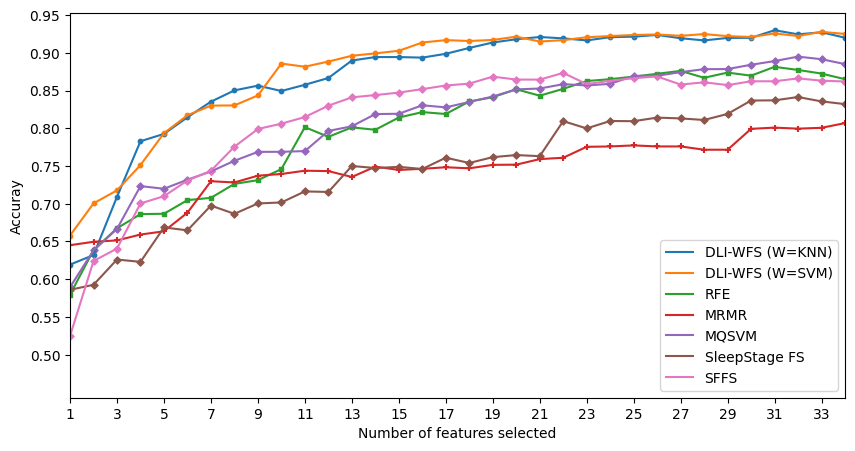

In [291]:
fig = plt.figure(figsize=(10, 5)) 
plt.plot(EWWW_score_list_knn, label='DLI-WFS (W=KNN)')
plt.scatter(np.arange(0,len(EWWW_score_list_knn)), EWWW_score_list_knn, marker='o',s=10)

plt.plot(EWWW_score_list_svm, label='DLI-WFS (W=SVM)')
plt.scatter(np.arange(0,len(EWWW_score_list_svm)), EWWW_score_list_svm, marker='o',s=10)

#plt.plot(KNFI_score_list, label='KNFI')
#plt.scatter(np.arange(0,len(KNFI_score_list)), KNFI_score_list, marker='^',s=10)

plt.plot(RFE_score_list, label='RFE')
plt.scatter(np.arange(0,len(RFE_score_list)), RFE_score_list, marker='s',s=10)

plt.plot(MRMR_score_list, label='MRMR')
plt.scatter(np.arange(0,len(MRMR_score_list)), MRMR_score_list, marker='+',s=13)

#plt.plot(IWFS_score_list, label='SVM-RFE-CA')
#plt.scatter(np.arange(0,len(IWFS_score_list)), IWFS_score_list, marker='D',s=13)

plt.plot(score_list_sqsvm, label='MQSVM')
plt.scatter(np.arange(0,len(score_list_sqsvm)), score_list_sqsvm, marker='D',s=13)

plt.plot(score_list_sleep, label='SleepStage FS')
plt.scatter(np.arange(0,len(score_list_sleep)), score_list_sleep, marker='D',s=13)

plt.plot(SFFS_score_list_new, label='SFFS')
plt.scatter(np.arange(0,len(SFFS_score_list_new)), SFFS_score_list_new, marker='D',s=13)

plt.legend()
plt.xticks(np.arange(1, 34, 2))
plt.yticks((np.arange(0.5, 1, 0.05)))
plt.xlim(1, 34)
plt.xlabel('Number of features selected') 
plt.ylabel('Accuray') 
#plt.show()
plt.savefig('#feat.pdf', format='pdf')

In [200]:
score_plot=np.zeros([7,34])
for i,z in zip(range(0,6),[EWWW_score_list_knn,EWWW_score_list_svm,RFE_score_list,MRMR_score_list,score_list_sqsvm,score_list_sleep]):
    score_plot[i,:]=z[0:34]

In [201]:
os.getcwd()
os.chdir('/home/jupy/SourceAnalysis/BenchmarkDataset/EMBC2024')
np.save('score_plot_knn_classf',score_plot)
#### Order:
# EWWW_score_list_knn,EWWW_score_list_svm,RFE_score_list,MRMR_score_list,score_list_sqsvm,score_list_sleep

In [283]:
#for i,z in zip(range(0,6),[EWWW_score_list_knn,EWWW_score_list_svm,RFE_score_list,MRMR_score_list,score_list_sqsvm,score_list_sleep]):
    
EWWW_score_list_knn=np.load('score_plot_knn_classf.npy')[0,:]
EWWW_score_list_svm=np.load('score_plot_knn_classf.npy')[1,:] 
RFE_score_list=np.load('score_plot_knn_classf.npy')[2,:]
MRMR_score_list_svm=np.load('score_plot_knn_classf.npy')[3,:]   
score_list_sqsvm=np.load('score_plot_knn_classf.npy')[4,:] 
score_list_sleep=np.load('score_plot_knn_classf.npy')[5,:]
SFFS_score_list=SFFS_score_list_new
#EWWW_score_list_svm=np.load('score_plot_svm_classf.npy')[6,:] 

In [275]:
score_list_sleep[-1]

0.8355631141345428

In [284]:
EWWW_score_list_knn=EWWW_score_list_knn.tolist()+[0.920]
EWWW_score_list_svm=EWWW_score_list_svm.tolist()+[0.925] 
RFE_score_list=RFE_score_list.tolist()+[0.865]
MRMR_score_list=(MRMR_score_list)+[0.829]  
score_list_sqsvm=score_list_sqsvm.tolist()+[0.885] 
score_list_sleep=score_list_sleep.tolist()+[0.832]

# Sig test 16 feature vs 30 features

In [162]:
feat_1=frequencyDict_knn[0:30 ]
feat_2=frequencyDict_knn[0:16 ]

acc1=[]
acc2=[]
clf_svm=knn
for s in range(1,10):
    
    clf_svm.fit(Xtv[s][:,feat_1],Ytv[s])
    acc1.append(accuracy_score(clf_svm.predict(Xtest[s][:,feat_1]),Ytest[s]))
    clf_svm.fit(Xtv[s][:,feat_2],Ytv[s])
    acc2.append(accuracy_score(clf_svm.predict(Xtest[s][:,feat_2]),Ytest[s]))

In [163]:

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


compdata = np.concatenate([acc1,acc2])

labels = ['30 features'] * len(acc1) + ['16 features'] * len(acc2)

f_statistic, p_value = f_oneway(acc1,acc2)
print(f'ANOVA p-value: {p_value}')

tukey_results = pairwise_tukeyhsd(compdata, labels)
print(tukey_results)


ANOVA p-value: 0.2525971505719227
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
16 features 30 features   0.0185 0.2526 -0.0146 0.0516  False
-------------------------------------------------------------


# Compare (KNN as classifier)

In [141]:
model_names=['Proposed Model (W=KNN)', 'Proposed Model (W=SVM)', 'RFE', 'MRMR', "MQSVM","SleepStage FS" ]
scorelists=[EWWW_score_list_knn[0:34],EWWW_score_list_svm[0:34],RFE_score_list[0:34], 
            MRMR_score_list[0:34], score_list_sqsvm[0:34],score_list_sleep[0:34],]
for i in range(0, len(model_names)):
    print(model_names[i],np.argmax(scorelists[i])-1,' ',max(scorelists[i]), 'F=16', scorelists[i][18] )

#np.argmax(EWWW_score_list)

Proposed Model (W=KNN) 30   0.9299083522297809 F=16 0.9064295162509448
Proposed Model (W=SVM) 32   0.9277588813303098 F=16 0.9156320861678005
RFE 30   0.8813728269085411 F=16 0.8355300453514739
MRMR 29   0.8543650793650793 F=16 0.8252834467120181
MQSVM 31   0.8886243386243386 F=16 0.85244708994709
SleepStage FS 31   0.8413737717309145 F=16 0.7539588057445199


In [261]:
#SFFS_score_list_new=(np.array(SFFS_score_list)-0.12).tolist()

print(np.argmax(SFFS_score_list_new)-1,' ',max(SFFS_score_list_new), 'F=16', SFFS_score_list_new[17] )

21   0.8733418367346938 F=16 0.8566373771730914


# Classify each time 

In [111]:
def classif_each_time(t0,nfold,alpha_features,clf):
    avg_acc=0
    feature_scores=np.zeros([len(alpha_features)])
    for i in range(0,nfold): # n-fold CV
        
        l_test_id=np.arange(i*(subj_each_group/nfold),(i+1)*(subj_each_group/nfold)).astype(int)
        #print('l_test_id',l_test_id)
        l_train_id = [x for x in np.arange(0,subj_each_group) if x not in l_test_id]
        #print('l_train_id',l_train_id )
        
        ob_test_id=np.arange(subj_each_group+i*(subj_each_group/nfold),subj_each_group+(i+1)*(subj_each_group/nfold)).astype(int)
        #print('ob_test_id',ob_test_id)
        ob_train_id = [x for x in np.arange(subj_each_group,subj_each_group*2) if x not in ob_test_id]
        #print('ob_train_id',ob_train_id )
        
        t0_l_train=t0[l_train_id,:][:,alpha_features]
        t0_l_test=t0[l_test_id,:][:,alpha_features]
        t0_ob_train=t0[ob_train_id,:][:,alpha_features]
        t0_ob_test=t0[ob_test_id,:][:,alpha_features]
        t0_train=np.vstack([t0_l_train,t0_ob_train])
        t0_train=pd.concat([pd.DataFrame(t0_train), 
                        pd.Series( np.hstack([np.zeros([int(subj_each_group-subj_each_group/nfold)
                                                    ,]),np.ones([int(subj_each_group-subj_each_group/nfold),])]) )  ],axis=1)
        t0_test=np.vstack([t0_l_test,t0_ob_test])
        shuffled_t0_train = t0_train.sample(frac=1, random_state=42)  # Set a random_state for reproducibility
        shuffled_t0_train.reset_index(drop=True, inplace=True)

        clf.fit(np.array(shuffled_t0_train)[:,:-1],np.array(shuffled_t0_train)[:,-1])
        #feature_scores=feature_scores+rf.feature_importances_
        avg_acc=avg_acc+(accuracy_score(clf.predict(t0_test), 
                                        np.hstack([np.zeros([int(subj_each_group/nfold)
                                                    ,]),np.ones([int(subj_each_group/nfold),])])))
        
    avg_acc=avg_acc/nfold
    return avg_acc,feature_scores

In [102]:
alpha_features=([1685, 4345, 4845, 5461, 5333, 2579, 1330, 4982, 5457, 7143, 4983,
       6877, 4847, 7546, 7191, 6897, 5739, 6020, 7617])
timestates=np.array([0,15,30,45,60,90,120,180,240]).astype(str)

In [108]:
subj_each_group=27 ####### Each group 27 subject, we have 3 stages, so 27*3
y=np.zeros([subj_each_group,]).astype(int).tolist()+np.ones([subj_each_group,]).astype(int).tolist()
print('y ',len(y))

Xtv_id={}
Xtest_id={}
index_lean={}
index_ob={}
for s in range(0,9):
    index_lean[s]= ([np.where(np.array(y)==1)][0][0])[s*int(subj_each_group*2/9/2):(s+1)*int(subj_each_group*2/9/2)]
    index_ob[s]= ([np.where(np.array(y)==0)][0][0])[s*int(subj_each_group*2/9/2):(s+1)*int(subj_each_group*2/9/2)]
    print (int(subj_each_group*2/9/2))
    print(s,index_ob[s],index_lean[s])
    index_test=index_lean[s].tolist()+index_ob[s].tolist()
    Xtest_id[s]=index_test
    index_train=np.arange(0,subj_each_group*2)[np.isin(np.arange(0,subj_each_group*2), index_test,invert=True)]
    Xtv_id[s]=index_train

Xdata=connectivity[freq_band] ## change band here
Ydata=np.array(Y)
Xtv={}
Ytv={}
Xtest={}
Ytest={}
for s in range(0,9):
    Xtv[s]=np.zeros([9,7744])
    Ytv[s]=np.zeros([9,])
    for train_id in Xtv_id[s]:
        Xtv[s]=np.vstack([Xtv[s],Xdata[train_id*9:(train_id+1)*9,:]])
        Ytv[s]=np.hstack([Ytv[s],Ydata[train_id*9:(train_id+1)*9,]])
    Xtv[s]=Xtv[s][9:,:] 
    Ytv[s]=Ytv[s][9:]
    
    Xtest[s]=np.zeros([9,7744])
    Ytest[s]=np.zeros([9,])
    for test_id in Xtest_id[s]:
        Xtest[s]=np.vstack([Xtest[s],Xdata[test_id*9:(test_id+1)*9,:]])
        Ytest[s]=np.hstack([Ytest[s],Ydata[test_id*9:(test_id+1)*9,]])
    Xtest[s]=Xtest[s][9:,:]  
    Ytest[s]=Ytest[s][9:]

y  54
3
0 [0 1 2] [27 28 29]
3
1 [3 4 5] [30 31 32]
3
2 [6 7 8] [33 34 35]
3
3 [ 9 10 11] [36 37 38]
3
4 [12 13 14] [39 40 41]
3
5 [15 16 17] [42 43 44]
3
6 [18 19 20] [45 46 47]
3
7 [21 22 23] [48 49 50]
3
8 [24 25 26] [51 52 53]


In [115]:
nfold=9
pattern=[]
ac=[]
feat_imp_with15=[]
for state_numb in range(0,9):
#for state_numb in [1]:
    t0=Xdata[state_numb*int(subj_each_group*2):(state_numb+1)*int(subj_each_group*2) , :]
    ACC=np.around(classif_each_time(t0,nfold,alpha_features,rf)[0], decimals=2)
    print('time',timestates[state_numb],' ',ACC)
    ac.append(ACC)
    feat_imp_with15.append(classif_each_time(t0,nfold,alpha_features,rf)[1])

time 0   0.63
time 15   0.59
time 30   0.26
time 45   0.59
time 60   0.76
time 90   0.67
time 120   0.39
time 180   0.39
time 240   0.5


### MDRMR

### feature selection

### significance test

In [273]:
import statistics
for i in [acc_knnWarp_knnClassif,acc_knnWarp_svmClassif,acc_svmWarp_knnClassif,acc_svmWarp_svmClassif,
         acc_MRMR_svmClassif,acc_MRMR_knnClassif]:
    print('mean',np.sum(i)/len(i), ' std', statistics.stdev(i))

mean 0.9018518518518519  std 0.03908923505922854
mean 0.8129629629629628  std 0.03849991636916709
mean 0.8592592592592592  std 0.05105203241514897
mean 0.812962962962963  std 0.033184395199297806
mean 0.8092592592592593  std 0.051682557256628354
mean 0.8666666666666666  std 0.04999618946004097


In [275]:
from scipy.stats import f_oneway
f_value, p_value = f_oneway(acc_knnWarp_knnClassif, acc_knnWarp_svmClassif, acc_svmWarp_knnClassif, acc_svmWarp_svmClassif, acc_MRMR_svmClassif, acc_MRMR_knnClassif)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("The lists are significantly different (reject null hypothesis)")
else:
    print("The lists are not significantly different (fail to reject null hypothesis)")

The lists are significantly different (reject null hypothesis)


In [280]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#all_data = acc_knnWarp_knnClassif + acc_knnWarp_svmClassif + acc_svmWarp_knnClassif + acc_svmWarp_svmClassif + acc_MRMR_svmClassif + acc_MRMR_knnClassif
all_data = acc_knnWarp_knnClassif + acc_svmWarp_knnClassif + acc_MRMR_knnClassif
group_labels = ['knnWrap_knnClassif (D=12)'] * len(acc_knnWarp_knnClassif) +  ['svmWrap_knnClassif (D=38)'] * len(acc_svmWarp_knnClassif) + ['MRMR_knnClassif (D=26)'] * len(acc_MRMR_knnClassif)

tukey_result = pairwise_tukeyhsd(all_data, group_labels)
print(tukey_result.summary())


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
          group1                    group2          meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------
   MRMR_knnClassif (D=26) knnWrap_knnClassif (D=12)  -0.0148 0.6781 -0.0582 0.0286  False
   MRMR_knnClassif (D=26) svmWrap_knnClassif (D=38)  -0.0037 0.9757 -0.0471 0.0397  False
knnWrap_knnClassif (D=12) svmWrap_knnClassif (D=38)   0.0111 0.8025 -0.0323 0.0545  False
-----------------------------------------------------------------------------------------


##### 12 KNN wrapper + KNN classif features 

In [4]:
#feat_plot=frequencyDict_svm[0:17]
feat_plot=[5418, 5390, 4847, 4517, 4159, 5468, 5309, 7511, 5593, 1330, 4231,976,1330, 6297, 7009, 4137, 5457 ]

In [5]:
os.chdir('/home/jupy/SourceAnalysis')
#coordinates=pd.read_csv('allBA_eLORETA-ROI.csv').values[:,0:3]
#coordinates.shape
coordinates=np.loadtxt('allBA_eLORETA-ROIcentroids.txt')

ROI85=[ -8.785714 ,  28.64286  ,  21.28572  ,  53.       ]
ROI86=ROI85
ROI87=   [  7.529412 ,  29.58824  ,  20.41176  ,  54.       ]
ROI88=ROI87

coordinates=np.vstack([coordinates,ROI85,ROI86,ROI87,ROI88])[:,0:3]
coordinates.shape

(88, 3)

coherence btw channel pair:  61 50
coherence btw channel pair:  61 22
coherence btw channel pair:  55 7
coherence btw channel pair:  51 29
coherence btw channel pair:  47 23
coherence btw channel pair:  62 12
coherence btw channel pair:  60 29
coherence btw channel pair:  85 31
coherence btw channel pair:  63 49
coherence btw channel pair:  15 10
coherence btw channel pair:  48 7
coherence btw channel pair:  11 8
coherence btw channel pair:  15 10
coherence btw channel pair:  71 49
coherence btw channel pair:  79 57
coherence btw channel pair:  47 1
coherence btw channel pair:  62 1


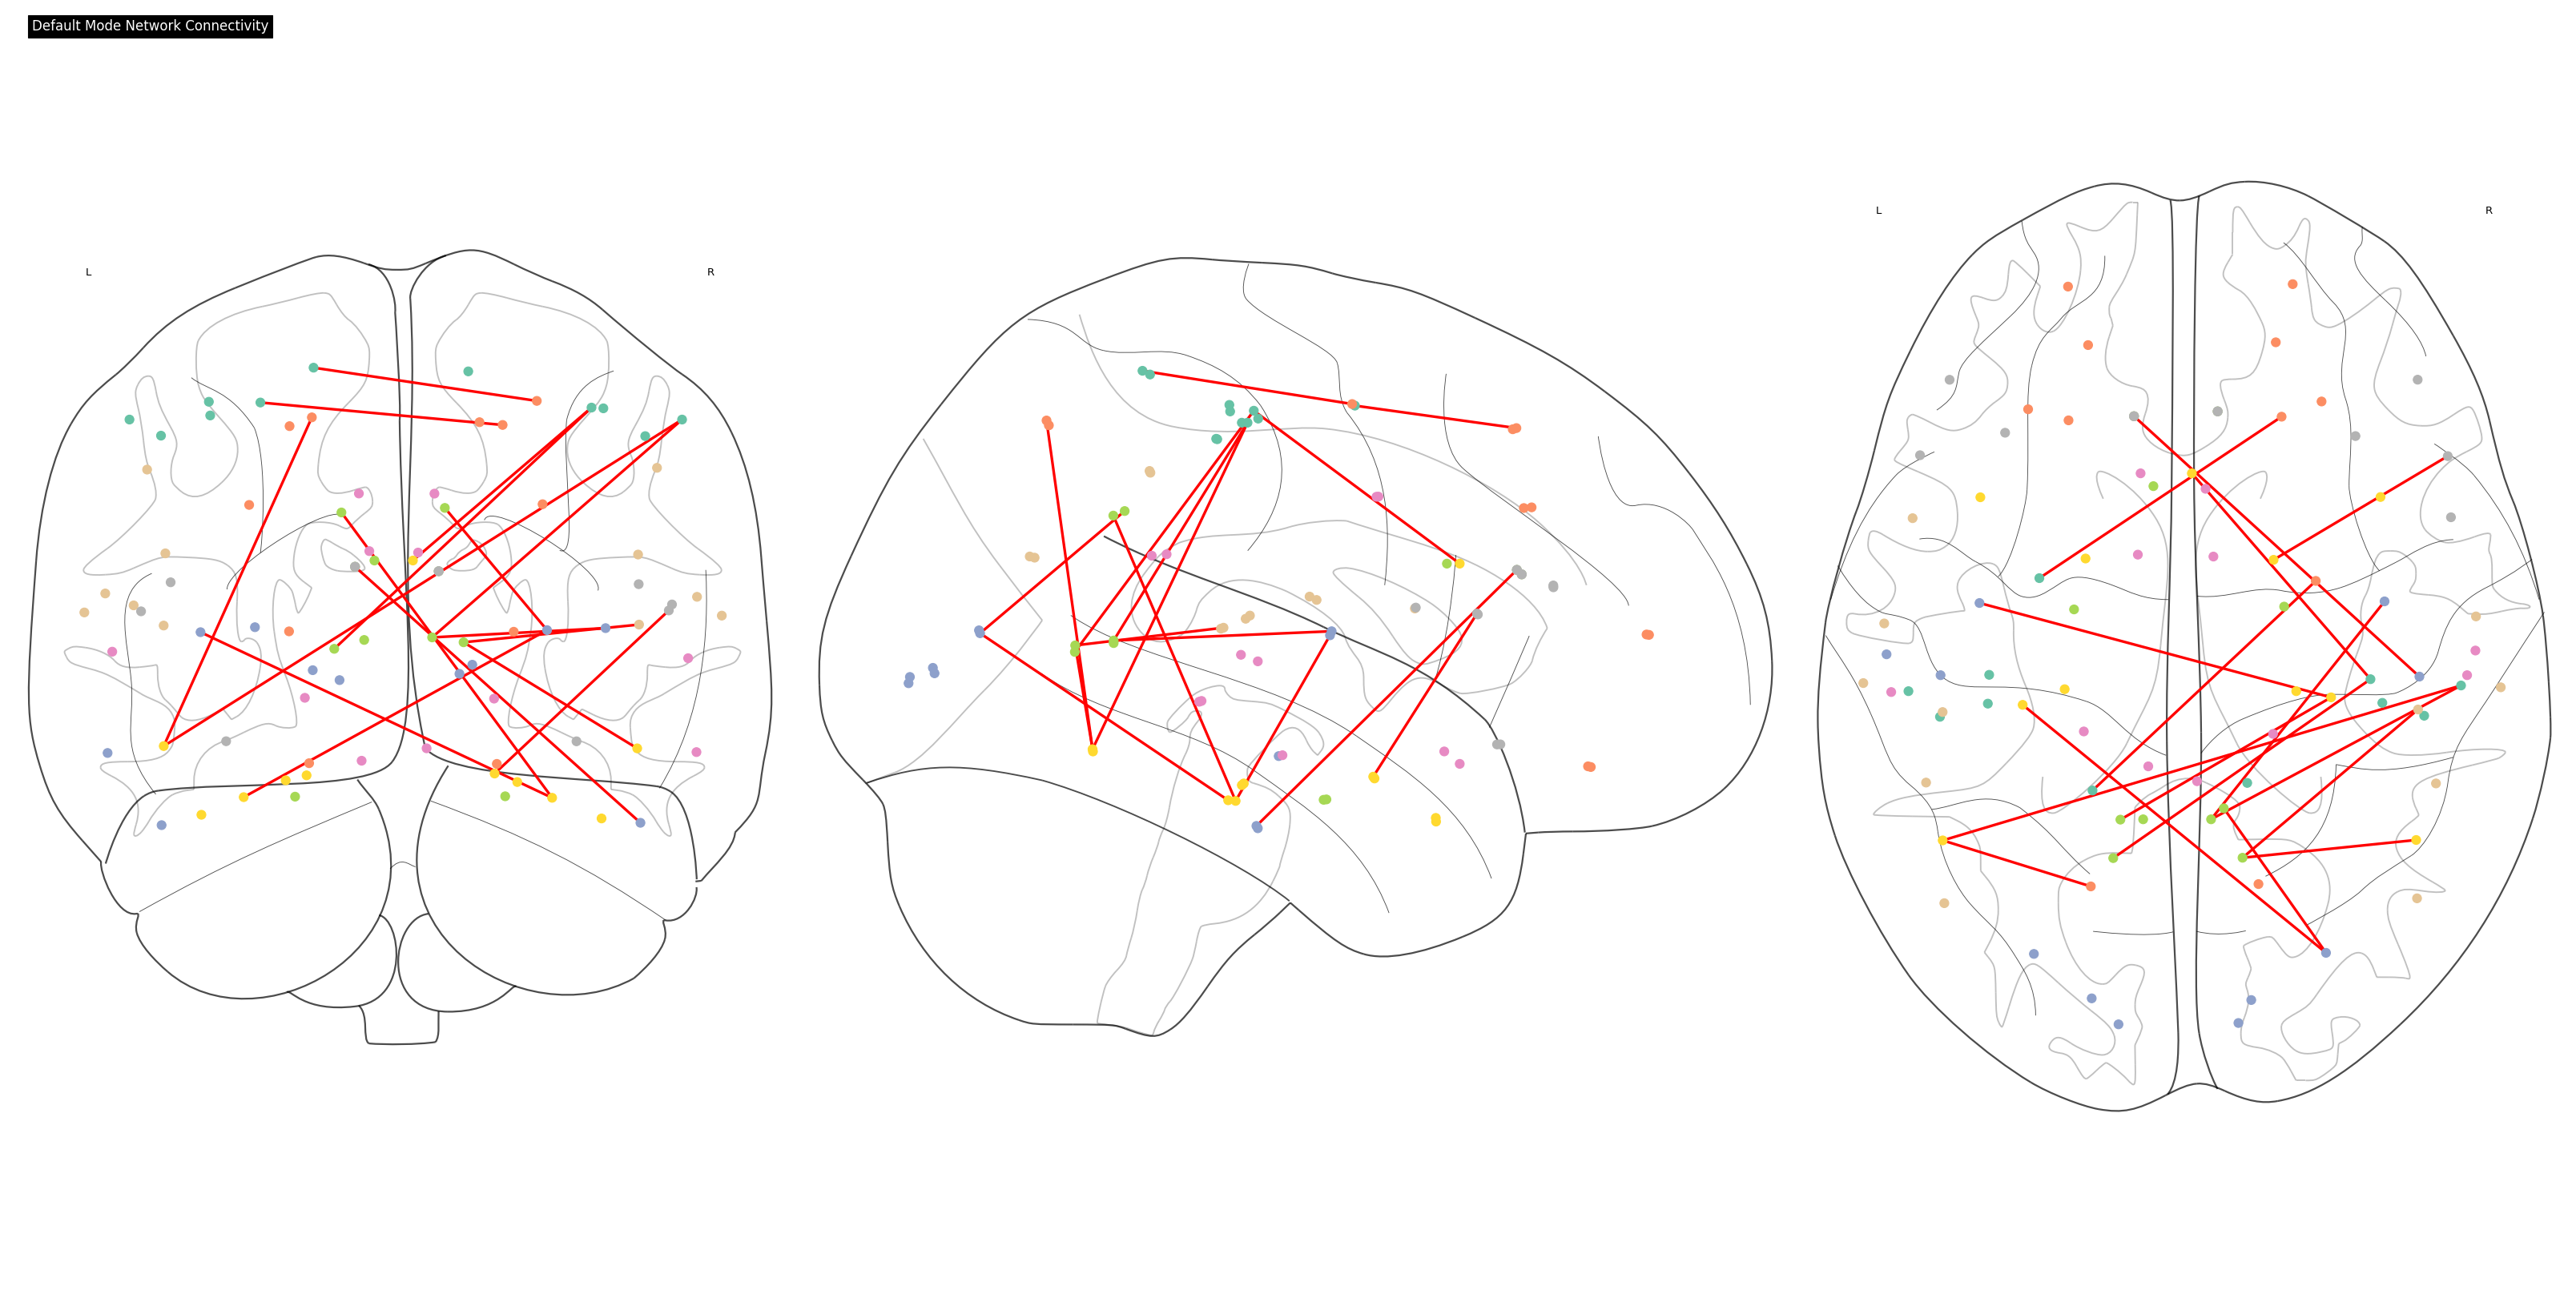

In [6]:
sensor= np.arange(0,88)#.astype(str)

nodes1=np.zeros([2])
nodes2=np.zeros([2])


for i in feat_plot:
    chanel1=int((i)//88)
    name_chan1=sensor[chanel1]
    chanel2=int((i)%88)
    name_chan2=sensor[chanel2]
    
    nodes1=np.vstack([nodes1,np.array([name_chan1,name_chan2])])
    nodes2=np.vstack([nodes2,np.array([name_chan2,name_chan1])])
    print('coherence btw channel pair: ', name_chan1,name_chan2)
nodes1=nodes1[1:,:].astype(int)
nodes2=nodes2[1:,:].astype(int)

nodes_ar=np.zeros([88,88])
for i in range(0,nodes1.shape[0]):
    nodes_ar[nodes1[i][0],nodes1[i][1]]=1
    nodes_ar[nodes2[i][0],nodes2[i][1]]=1

import nilearn
from nilearn import plotting
from matplotlib.pyplot import figure
sa=figure(figsize = (40, 20), dpi = 80)
os.chdir('/home/jupy')
plotting.plot_connectome(nodes_ar, coordinates,node_size=100,figure=sa,
                         title="Default Mode Network Connectivity" )

##### tuning gamma

In [22]:
cv = StratifiedKFold(n_splits=10,  shuffle=False)
tune_gamma_result=[]
for gamma in np.arange(210.1,230.1,1):
    re=[]
    for s in range(0,10):
        clf_svm=SVC(kernel='rbf',probability=True, random_state=42,gamma=gamma) 
        AC=cross_val_score(clf_svm, Xtv[s][:,ff], Ytv[s], scoring='accuracy', cv=cv, n_jobs=-1)
        re.append(sum(AC)/len(AC))

    tune_gamma_result.append (sum(re)/len(re)) 
    print('gamma is', gamma, 'acc is',sum(re)/len(re))  

gamma is 210.1 acc is 0.8271215986394556
gamma is 211.1 acc is 0.8269175170068026
gamma is 212.1 acc is 0.8267134353741497
gamma is 213.1 acc is 0.8269175170068028
gamma is 214.1 acc is 0.8271215986394557
gamma is 215.1 acc is 0.8271215986394557
gamma is 216.1 acc is 0.8269132653061224
gamma is 217.1 acc is 0.8269132653061224
gamma is 218.1 acc is 0.8269132653061224
gamma is 219.1 acc is 0.8269132653061224
gamma is 220.1 acc is 0.8271215986394559
gamma is 221.1 acc is 0.827125850340136
gamma is 222.1 acc is 0.8267134353741497
gamma is 223.1 acc is 0.8267134353741497
gamma is 224.1 acc is 0.8265093537414966
gamma is 225.1 acc is 0.8267134353741497
gamma is 226.1 acc is 0.8265136054421769
gamma is 227.1 acc is 0.8263095238095239
gamma is 228.1 acc is 0.8263095238095239
gamma is 229.1 acc is 0.8263095238095239


In [103]:

state_numb=1
t0=connectivity[band][state_numb*60:(state_numb+1)*60 , :]

def classif_each_time(t0):
    avg_acc=0
    for i in range(0,6): # 6-fold CV
        l_test_id=np.arange(i*5,(i+1)*5)
        l_train_id = [x for x in np.arange(0,30) if x not in l_test_id]
        ob_test_id=np.arange(30+i*5,30+(i+1)*5)
        ob_train_id = [x for x in np.arange(30,60) if x not in ob_test_id]

        t0_l_train=t0[l_train_id,:][:,alpha_features]
        t0_l_test=t0[l_test_id,:][:,alpha_features]
        t0_ob_train=t0[ob_train_id,:][:,alpha_features]
        t0_ob_test=t0[ob_test_id,:][:,alpha_features]
        t0_train=np.vstack([t0_l_train,t0_ob_train])
        t0_train=pd.concat([pd.DataFrame(t0_train), pd.Series( np.hstack([np.zeros([25,]),np.ones([25,])]) )  ],axis=1)
        t0_test=np.vstack([t0_l_test,t0_ob_test])
        shuffled_t0_train = t0_train.sample(frac=1, random_state=42)  # Set a random_state for reproducibility
        shuffled_t0_train.reset_index(drop=True, inplace=True)

        rf.fit(np.array(shuffled_t0_train)[:,:-1],np.array(shuffled_t0_train)[:,-1])
        avg_acc=avg_acc+(accuracy_score(rf.predict(t0_test), [0,0,0,0,0,1,1,1,1,1]))
    avg_acc=avg_acc/6
    return avg_acc

In [104]:
alpha_features=([5418, 5390, 4847, 4517, 4159, 5468, 5309, 7511, 5593, 1330, 4231,976])
timestates=np.array([0,15,30,45,60,90,120,180,240]).astype(str)

In [105]:
for state_numb in range(0,9):
    t0=connectivity[band][state_numb*60:(state_numb+1)*60 , :]
    print(timestates[state_numb],' ',classif_each_time(t0))

0   0.5833333333333334
15   0.6333333333333334
30   0.55
45   0.65
60   0.5666666666666668
90   0.5333333333333333
120   0.5833333333333334
180   0.5833333333333334
240   0.5666666666666667


In [143]:
from sklearn.manifold import TSNE
def tsne_plot(tsne_input,state_numb):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(tsne_input)
    data_1= tsne_result[0:30,:]
    data_2 = tsne_result[30:60,:]
    # Create a scatter plot with different colors for each group
    plt.scatter(data_1[:, 0], data_1[:, 1], c='b', label='Lean', marker='o',alpha=0.3)
    plt.scatter(data_2[:, 0], data_2[:, 1], c='r', label='Obese', marker='s',alpha=0.3)

    for p,corl in zip([4,12,26],['crimson','#800000','#FF6347']):
        plt.scatter(data_1[p, 0], data_1[p, 1], c=corl,marker='+',s=100)
        
    for pp,corl in zip([6,15,29],['navy','#008080','#6A5ACD']):
        plt.scatter(data_2[pp, 0], data_2[pp, 1], c=corl,marker='x',s=100)
    
    
    plt.title(f'{timestates[state_numb]}min')
    plt.legend()
    plt.show()

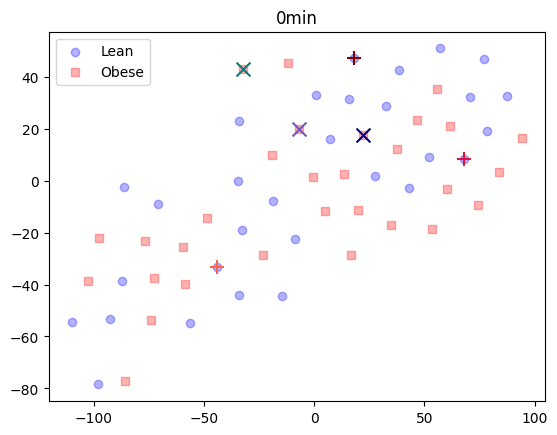

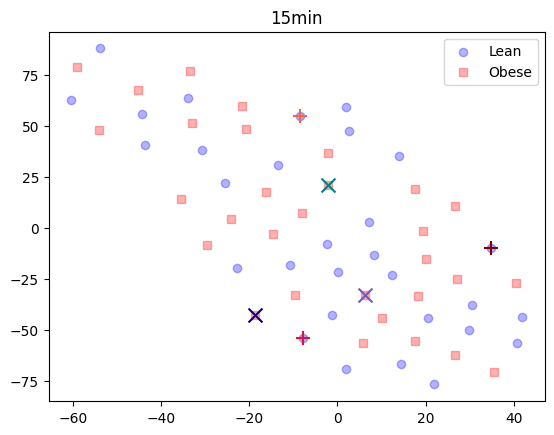

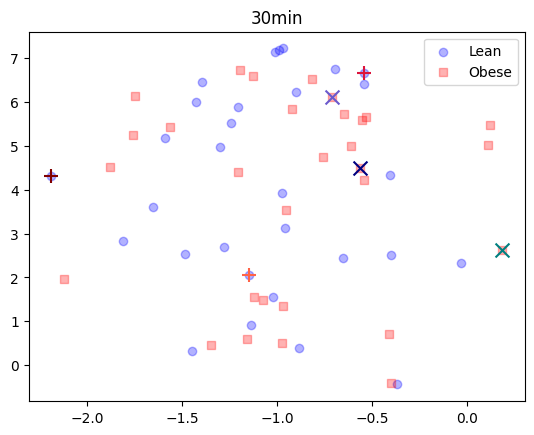

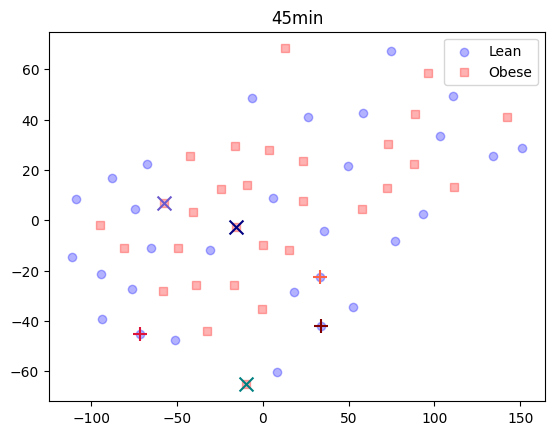

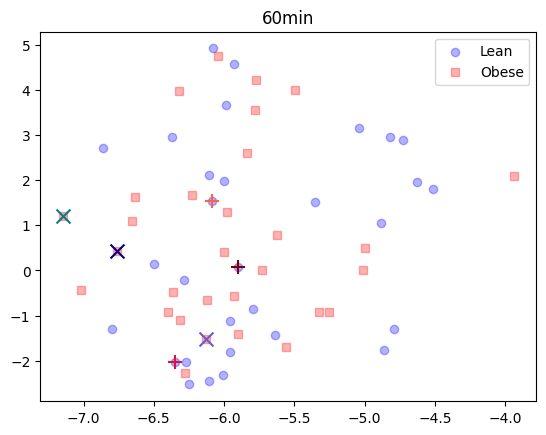

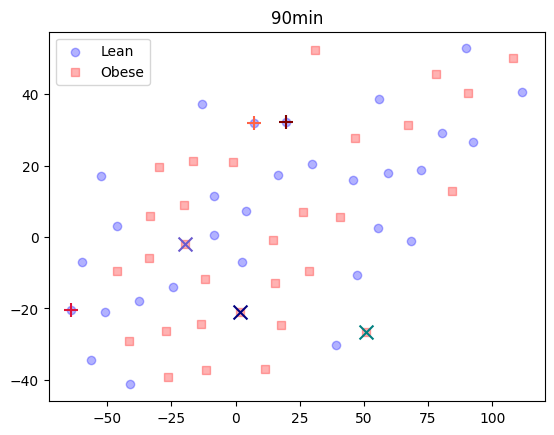

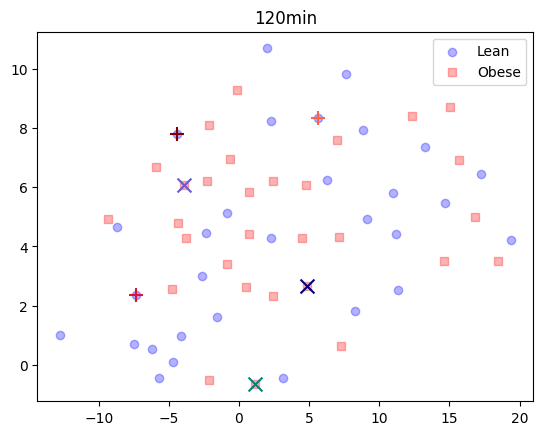

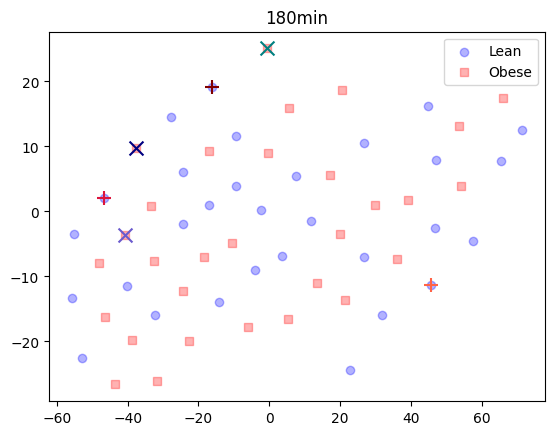

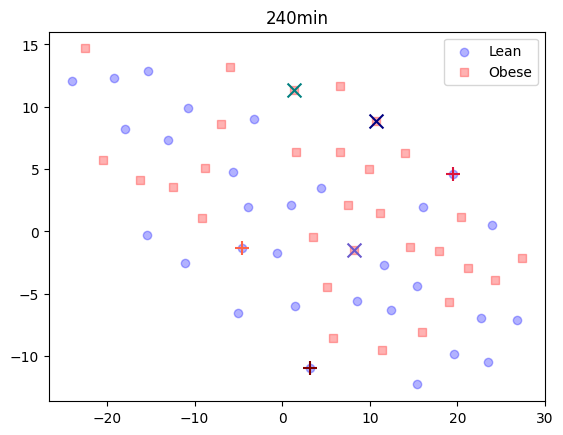

In [144]:
for state_numb in range(0,9):
    #state_numb=3 
    tsne_input=connectivity[band][state_numb*60:(state_numb+1)*60 , :][:,alpha_features]
    tsne_plot(tsne_input,state_numb)

88.0